In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, kruskal

In [21]:
# Load the dataset
benin = pd.read_csv(r"C:/Users/jilow/OneDrive/Documents/Cleaned-data/benin_clean.csv")
sierra_leone = pd.read_csv(r"C:/Users/jilow/OneDrive/Documents/Cleaned-data/sierraleone_clean.csv")
togo = pd.read_csv(r"C:/Users/jilow/OneDrive/Documents/Cleaned-data/togo_clean.csv")


Metric Comparison

Box plots

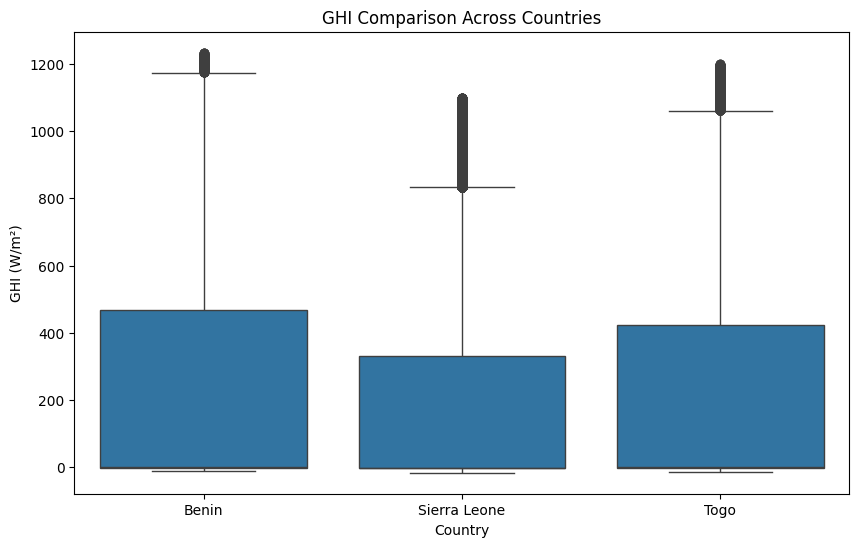

In [28]:
# Combine data into a DataFrame for Seaborn's long-form format
combined = pd.DataFrame({
    'GHI': pd.concat([benin['GHI'], sierra_leone['GHI'], togo['GHI']]),
    'Country': ['Benin'] * len(benin) + ['Sierra Leone'] * len(sierra_leone) + ['Togo'] * len(togo)
})

# Plot using Seaborn's proper syntax
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Country',
    y='GHI',
    data=combined,
    order=['Benin', 'Sierra Leone', 'Togo']
)
plt.title('GHI Comparison Across Countries')
plt.ylabel('GHI (W/m²)')
plt.show()

Summary table

In [23]:
def generate_summary(df, country_name):
    return {
        'Country': country_name,
        'GHI Mean': df['GHI'].mean(),
        'GHI Median': df['GHI'].median(),
        'GHI Std': df['GHI'].std(),
        # Repeat for DNI/DHI
    }

summary_table = pd.DataFrame([
    generate_summary(benin, 'Benin'),
    generate_summary(sierra_leone, 'Sierra Leone'),
    generate_summary(togo, 'Togo')
])
print(summary_table)

        Country    GHI Mean  GHI Median     GHI Std
0         Benin  236.234508         0.7  328.288787
1  Sierra Leone  185.000024        -0.4  279.019460
2          Togo  223.859675         0.5  317.306277


Statistical Testing

In [29]:
# One-way ANOVA
f_stat, p_value = f_oneway(benin['GHI'], sierra_leone['GHI'], togo['GHI'])
print(f'ANOVA p-value: {p_value:.4f}')

# Kruskal-Wallis (non-parametric alternative)
h_stat, p_kruskal = kruskal(benin['GHI'], sierra_leone['GHI'], togo['GHI'])
print(f'Kruskal-Wallis p-value: {p_kruskal:.4f}')

ANOVA p-value: 0.0000
Kruskal-Wallis p-value: 0.0000


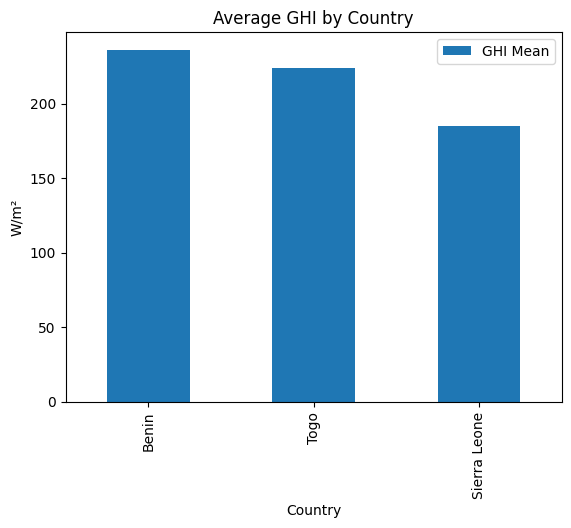

In [30]:
# Rank countries by average GHI
summary_table.sort_values('GHI Mean', ascending=False).plot(
    kind='bar', 
    x='Country', 
    y='GHI Mean', 
    title='Average GHI by Country'
)
plt.ylabel('W/m²')
plt.show()